# We'll start at 2:10ish PM 

Waiting for others to join the call :)

https://www.youtube.com/watch?v=uVjRe8QXFHY

<center><img src='img/cdy.png' style='width:500px; float: left; margin: 0px 30px 15px 0px'></center>

# Classification models
## Class 23 - Data Science Curriculum 

<br>

#### Women Building Change scholarship program 2023 🇧🇮
May 18, 2023





# ⏪ Recap last class

- Classification models
    - Logistic regression 
    - Naive Bayes
    - Support Vector Machines (SVM)
    - Decision Trees

# 🚀 Today's agenda

- Classification models
    - Logistic regression 
    - Naive Bayes
    - Support Vector Machines (SVM)
    - Decision Trees

# 🗺️📍 Guide map 

<center>
    <img src='img/classification.png' style='height:550px; float: center; margin: 0px 0px 0px 0px'>
</center>
    



# ❇️ Coding time! 

<br>
<center><img src='img/excited.gif' style='height:200px; float: center; margin: 0px 0px 0px 0px'></center>
<br>

# 🗺️📍 Guide map 

<br>
<center>
    <img src='img/pipeline.png' style='height:550px; float: center; margin: 0px 0px 0px 0px'>
</center>
    



## Classification models
### Steps for a classification model:

1. Acquire labeled data
2. Divide the data set into two:
    - Training and Test
3. Feature Engineering on Training dataset (Pre-processing, TF-IDF, etc...)
4. Train the model 
5. Obtain performance measures on test dataset and improve model
6. Put into production

In [ ]:
! pip install -U spacy
! python -m spacy download en_core_web_sm
! pip install --upgrade scikit-learn
! conda install graphviz

In [10]:
import pandas as pd
df= pd.read_csv("cancer.csv")

In [11]:
df.head()

,cancer_type,note
0,Thyroid_Cancer,Incidence Differences Between First PrimaryCan...
1,Thyroid_Cancer,Deoxyshikonin Inhibits Viability andGlycolysis...
2,Thyroid_Cancer,Aprospective blinded multicenter studyDear edi...
3,Lung_Cancer,"""Thirty micrograms of WCL were resolved by SDS..."
4,Lung_Cancer,"""These studies demonstrate that RRM1 could be ..."


In [12]:
df.note[0]

"Incidence Differences Between First PrimaryCancers and Second Primary Cancers FollowingSkin Squamous Cell Carcinoma as Etiological CluesThis  was published in the following Dove Press journalClinical Epidemiology\x93 KristinaGuoqiao ZhengSundquist4\x93 Jan Sundquist AkseliAsta F¶rsti KariHemminkiHemminki12411\x931Division of Molecular GeneticEpidemiology German Cancer ResearchCenter DKFZ Heidelberg D69120Germany 2Division of CancerEpidemiology German Cancer ResearchCenter DKFZ Heidelberg D69120Germany 3Faculty of Medicine Universityof Heidelberg Heidelberg Germany4Center for Primary Health Care ResearchLund University Malm¶   Sweden5Department of Family Medicine andCommunity Health Department ofPopulation Health Science and Policy IcahnSchool of Medicine at Mount SinaiNew York NY USA 6Center forCommunityBased Healthcare Researchand Education CoHRE Department ofFunctional Pathology School of MedicineShimane University Izumo Japan 7HoppChildren\x99s Cancer Center KiTZHeidelberg Germany 

In [13]:
from sklearn.model_selection import train_test_split

X = df[['note']]
y = df[['cancer_type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
import nltk
nltk.download('stopwords')

import json
import pandas as pd
import re
from nltk.corpus import stopwords
import spacy

sw = stopwords.words("english")
lemma_obj = spacy.load('en_core_web_sm')

def text_pre_processing(text):
    text = text.lower() # Make it lowercase
    text = re.sub(r"[\W\d]", " ", text) # Remove punctuation (regex)
    text = text.split() # Tokenize
    text = [word for word in text if word not in sw] # Remove stop words
    text = " ".join(text) # Make it a string

    # Lemmatization
    doc = lemma_obj(text)
    text = [token.lemma_ for token in doc]

    text = " ".join(text) # Make it a string
    return text

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(preprocessor=text_pre_processing, max_features=500)
tfidf_vect.fit(X_train.note.values);

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vmarquez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
y_train

,cancer_type
29,Thyroid_Cancer
535,Thyroid_Cancer
695,Thyroid_Cancer
557,Thyroid_Cancer
836,Lung_Cancer
...,...
106,Thyroid_Cancer
270,Thyroid_Cancer
860,Lung_Cancer
435,Thyroid_Cancer


In [16]:
X_train = tfidf_vect.transform(X_train.note.values)
y_train = y_train.cancer_type.values

X_test = tfidf_vect.transform(X_test.note.values)
y_test = y_test.cancer_type.values


In [17]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


In [18]:
# Initiliaze classifiers
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

In [19]:
# Train the models
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

In [20]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [22]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Naive Bayes:            0.94
Regresión Logística:    0.96
SVM:                    0.99
Árbol de decisión:      0.98


In [23]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='Thyroid_Cancer'):.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='Thyroid_Cancer'):.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='Thyroid_Cancer'):.2f}")
    print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label='Thyroid_Cancer'):.2f}")
    print()

precision_score
Naive Bayes: 0.94
Regresión Logística: 0.97
SVM: 0.98
Árbol de decisión: 0.98

recall_score
Naive Bayes: 0.95
Regresión Logística: 0.95
SVM: 1.00
Árbol de decisión: 0.99

f1_score
Naive Bayes: 0.95
Regresión Logística: 0.96
SVM: 0.99
Árbol de decisión: 0.99



In [24]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()

Naive Bayes
                precision    recall  f1-score   support

   Lung_Cancer       0.94      0.92      0.93        90
Thyroid_Cancer       0.94      0.95      0.95       110

      accuracy                           0.94       200
     macro avg       0.94      0.94      0.94       200
  weighted avg       0.94      0.94      0.94       200


Regresión Logística
                precision    recall  f1-score   support

   Lung_Cancer       0.95      0.97      0.96        90
Thyroid_Cancer       0.97      0.95      0.96       110

      accuracy                           0.96       200
     macro avg       0.96      0.96      0.96       200
  weighted avg       0.96      0.96      0.96       200


SVM
                precision    recall  f1-score   support

   Lung_Cancer       1.00      0.98      0.99        90
Thyroid_Cancer       0.98      1.00      0.99       110

      accuracy                           0.99       200
     macro avg       0.99      0.99      0.99       200
  

In [25]:
confusion_matrix(y_test, y_pred_nb)

array([[ 83,   7],
       [  5, 105]])

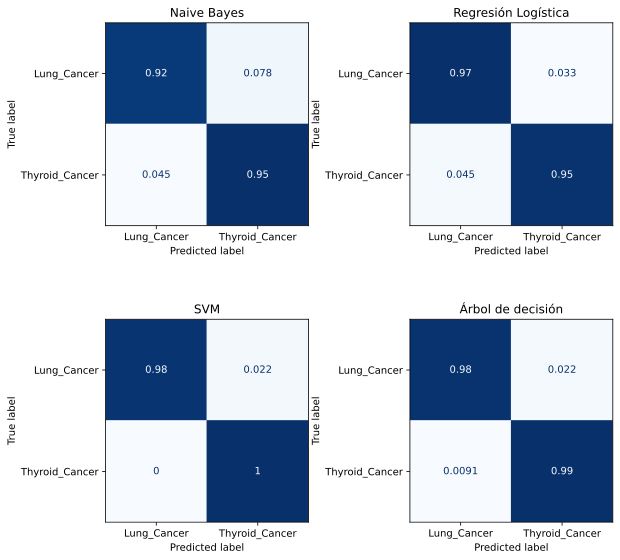

In [26]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");

ax4 = fig.add_subplot(2,2,4)
plot_confusion_matrix(dt, X_test, y_test, cmap = 'Blues', ax=ax4, normalize='true').im_.colorbar.remove() 
plt.title("Árbol de decisión");

In [27]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{353: 'primary',
 415: 'several',
 89: 'condition',
 262: 'malignant',
 468: 'tumor',
 438: 'study',
 150: 'evaluate',
 166: 'feature',
 475: 'use',
 175: 'follow',
 426: 'small',
 204: 'identify',
 111: 'datum',
 155: 'examine',
 14: 'age',
 369: 'range',
 498: 'year',
 261: 'male',
 167: 'female',
 371: 'ratio',
 236: 'involve',
 424: 'site',
 380: 'region',
 83: 'common',
 76: 'clinical',
 172: 'finding',
 216: 'include',
 58: 'case',
 451: 'term',
 120: 'describe',
 267: 'material',
 365: 'publish',
 38: 'august',
 199: 'hospital',
 276: 'medicine',
 472: 'university',
 39: 'author',
 118: 'department',
 408: 'section',
 171: 'find',
 388: 'represent',
 275: 'medical',
 241: 'know',
 361: 'protein',
 470: 'two',
 173: 'first',
 407: 'second',
 471: 'type',
 16: 'al',
 413: 'serum',
 37: 'association',
 61: 'cell',
 292: 'moreover',
 268: 'may',
 417: 'show',
 421: 'similar',
 186: 'genetic',
 36: 'associate',
 419: 'significant',
 329: 'patient',
 19: 'also',
 490: 'well',
 152: 'e

In [28]:
# Words that contribute to class 1
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]

[('nsclc', -4.27),
 ('lung', -3.43),
 ('non', -2.3),
 ('anti', -1.91),
 ('pulmonary', -1.9),
 ('egfr', -1.71),
 ('specific', -1.49),
 ('alk', -1.42),
 ('examine', -1.32),
 ('analysis', -1.18)]

In [29]:
[(vocab[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][-10:]

[('nsclc', 0.01),
 ('vol', 0.02),
 ('datum', 0.02),
 ('covid', 0.04),
 ('non', 0.04),
 ('ed', 0.05),
 ('original', 0.06),
 ('page', 0.09),
 ('august', 0.15),
 ('thyroid', 0.47)]

In [30]:
import graphviz 
from sklearn.tree import export_graphviz

viz = export_graphviz(dt, 
                      out_file=None, # ¿Salvar en el computador?
                    max_depth=5, # Máxima profundidad
                      feature_names=list(dict(sorted(tfidf_vect.vocabulary_.items())).keys()), # Palabras
                      class_names = ['basura', 'legítimo'],
                      rounded=True, filled=True
                     )

graph = graphviz.Source(viz)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

# ⏪ Today's recap

- Classification models
    - Logistic regression 
    - Naive Bayes
    - Support Vector Machines (SVM)
    - Decision Trees

<center><img src='img/bye.gif' style='height:250px;'></center> 

# Next class: Clustering models
# See you next Monday!